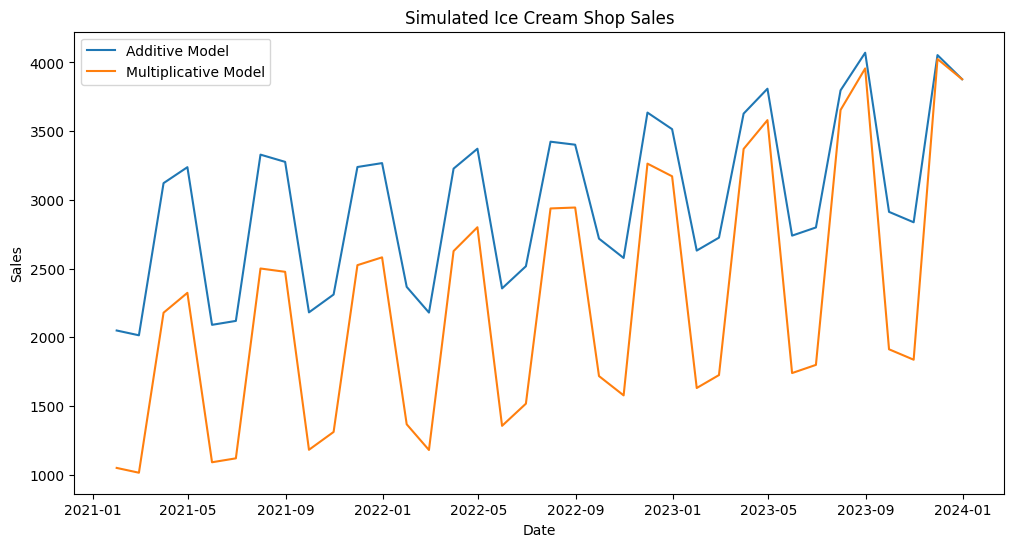

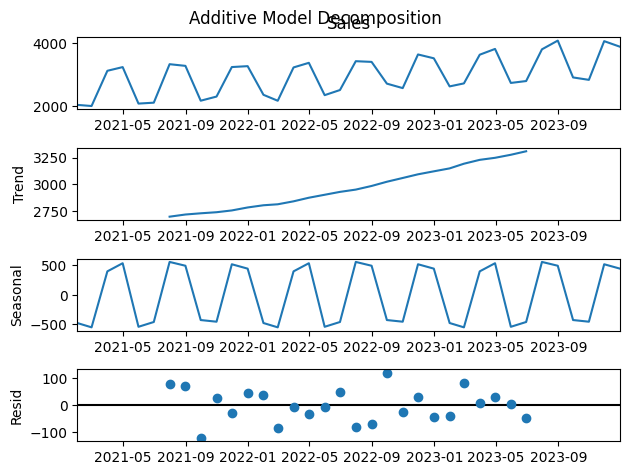

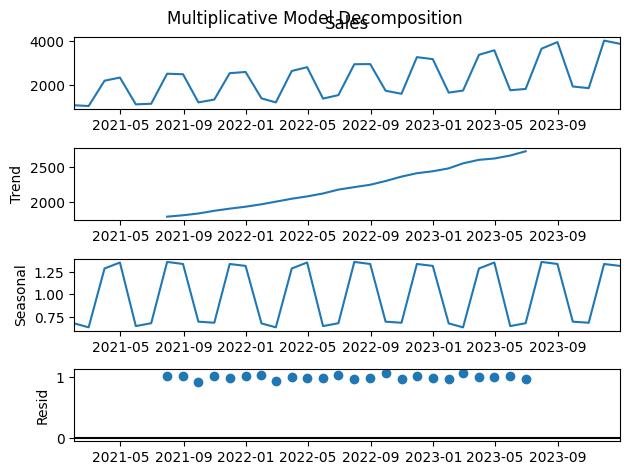

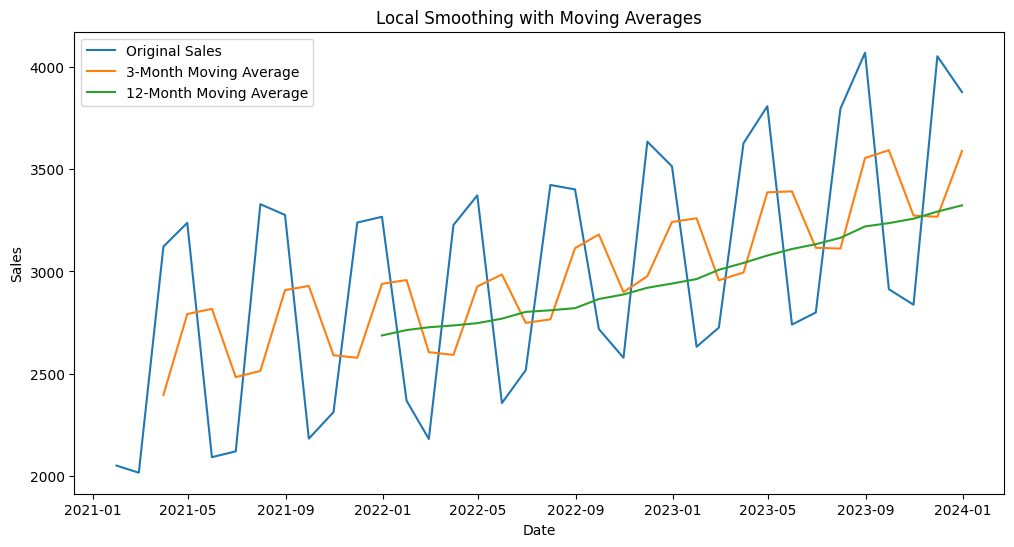

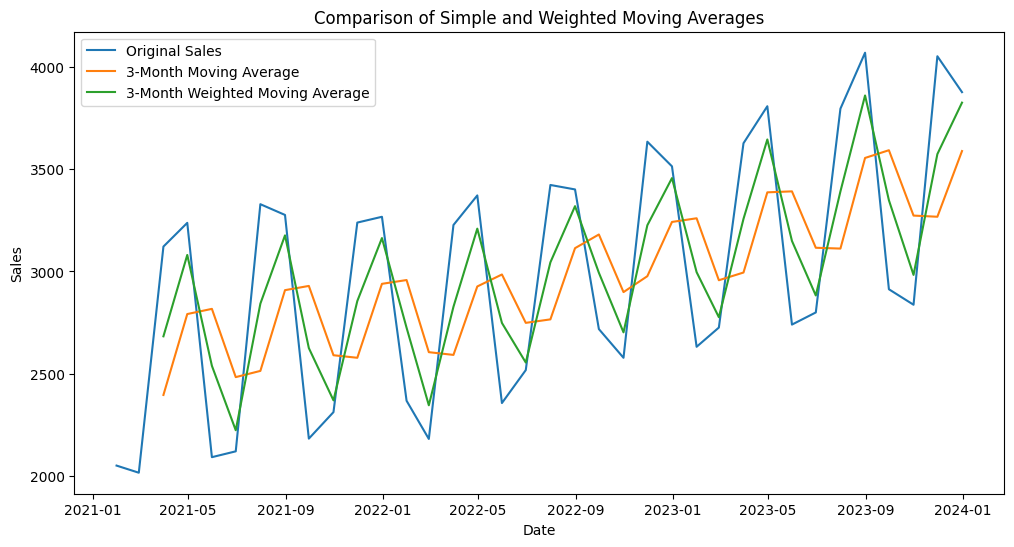

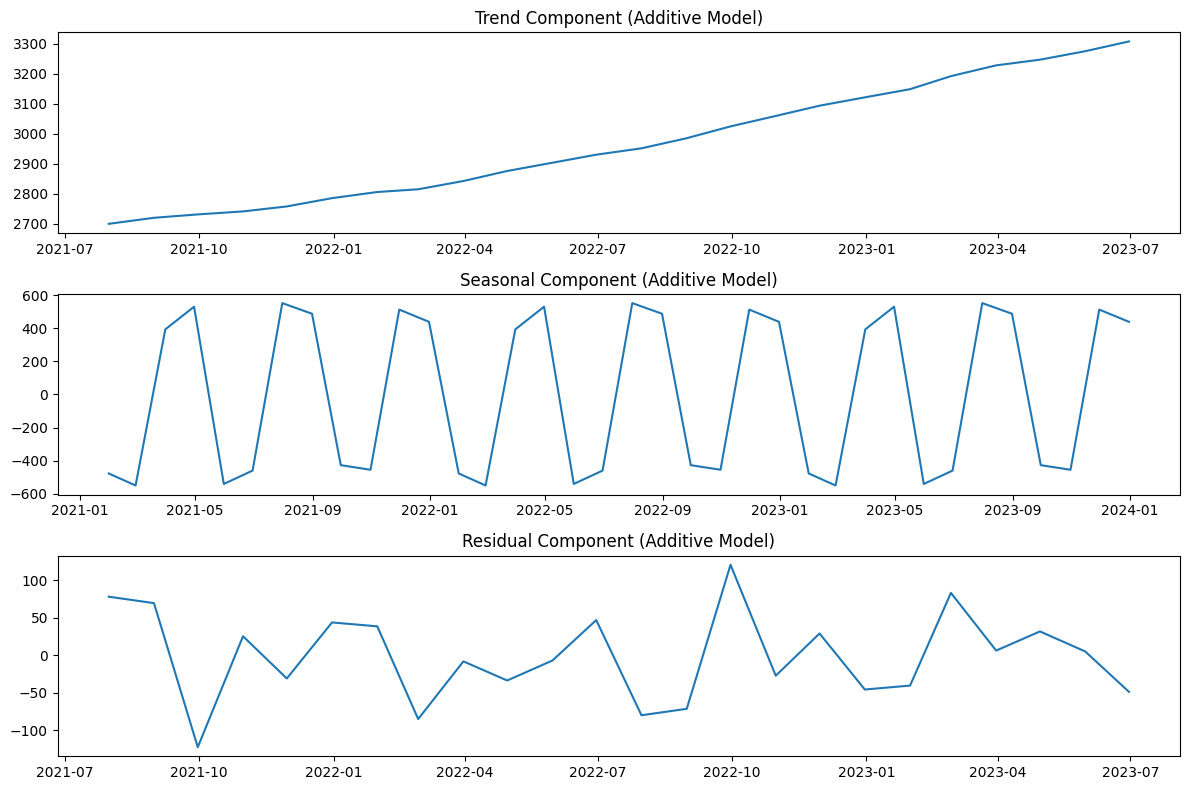

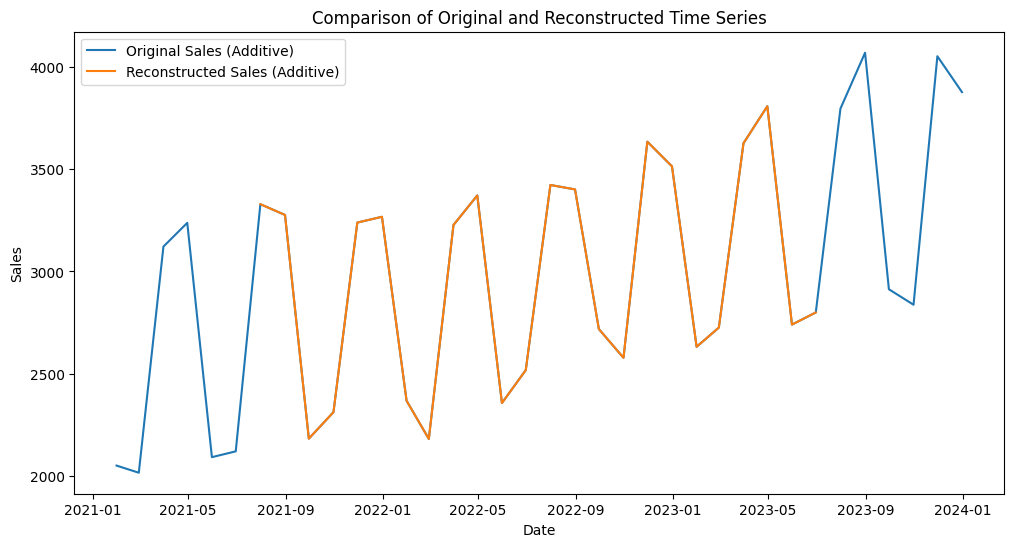

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Step 1: Simulate Data
# Simulate monthly sales data over three years for an ice cream shop
np.random.seed(42)
time = pd.date_range(start='2021-01-01', periods=36, freq='M')
trend = np.linspace(1000, 2000, 36)  # Linear increasing trend
seasonal_pattern = [1000, 1000, 2000, 2000] * 9  # Seasonal pattern over four quarters
noise = np.random.normal(0, 100, 36)  # Random noise

# Create sales data with an additive model (trend + seasonality + noise)
sales_additive = trend + seasonal_pattern + noise
data_additive = pd.DataFrame({'Date': time, 'Sales': sales_additive}).set_index('Date')

# Create sales data with a multiplicative model (trend * seasonality + noise)
sales_multiplicative = trend * (np.array(seasonal_pattern) / 1000) + noise
data_multiplicative = pd.DataFrame({'Date': time, 'Sales': sales_multiplicative}).set_index('Date')

# Plot simulated data
plt.figure(figsize=(12, 6))
plt.plot(data_additive, label='Additive Model')
plt.plot(data_multiplicative, label='Multiplicative Model')
plt.title('Simulated Ice Cream Shop Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Step 2: Decompose the Additive Model
# Question: Calculate the trend component using a moving average with a 12-month window.
result_additive = seasonal_decompose(data_additive['Sales'], model='additive', period=12)
result_additive.plot()
plt.suptitle('Additive Model Decomposition')
plt.show()

# Step 3: Decompose the Multiplicative Model
# Question: Use the ratio between actual and trend values for seasonal isolation (multiplicative model).
result_multiplicative = seasonal_decompose(data_multiplicative['Sales'], model='multiplicative', period=12)
result_multiplicative.plot()
plt.suptitle('Multiplicative Model Decomposition')
plt.show()

# Step 4: Local Smoothing Techniques
# Question: Apply a moving average with different window sizes to the data and plot the results.
data_additive['MA_3'] = data_additive['Sales'].rolling(window=3).mean()
data_additive['MA_12'] = data_additive['Sales'].rolling(window=12).mean()

plt.figure(figsize=(12, 6))
plt.plot(data_additive['Sales'], label='Original Sales')
plt.plot(data_additive['MA_3'], label='3-Month Moving Average')
plt.plot(data_additive['MA_12'], label='12-Month Moving Average')
plt.title('Local Smoothing with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Step 5: Weighted Moving Average
# Question: Experiment with a weighted moving average and compare the results to the simple moving average.
weights = np.array([0.1, 0.3, 0.6])
weighted_ma = data_additive['Sales'].rolling(window=3).apply(lambda x: np.dot(weights, x[-3:]), raw=True)

plt.figure(figsize=(12, 6))
plt.plot(data_additive['Sales'], label='Original Sales')
plt.plot(data_additive['MA_3'], label='3-Month Moving Average')
plt.plot(weighted_ma, label='3-Month Weighted Moving Average')
plt.title('Comparison of Simple and Weighted Moving Averages')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Step 6: Interpreting Decomposed Components
# Question: Analyze decomposed components (Additive Model) for trend, seasonality, and residuals.
trend_additive = result_additive.trend
seasonal_additive = result_additive.seasonal
residual_additive = result_additive.resid

plt.figure(figsize=(12, 8))
plt.subplot(311)
plt.plot(trend_additive)
plt.title('Trend Component (Additive Model)')
plt.subplot(312)
plt.plot(seasonal_additive)
plt.title('Seasonal Component (Additive Model)')
plt.subplot(313)
plt.plot(residual_additive)
plt.title('Residual Component (Additive Model)')
plt.tight_layout()
plt.show()

# Step 7: Constructing a Time Series from Components
# Question: Combine trend, seasonal, and residual components to construct a complete series.
reconstructed_additive = trend_additive + seasonal_additive + residual_additive

plt.figure(figsize=(12, 6))
plt.plot(data_additive['Sales'], label='Original Sales (Additive)')
plt.plot(reconstructed_additive, label='Reconstructed Sales (Additive)')
plt.title('Comparison of Original and Reconstructed Time Series')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()
